In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("animals")

In [3]:
import os

for root, dirs, files in os.walk('animals'):
    print(f'Found directory: {root}')
    for file in files[:5]:
        print(f'\t{file}')

Found directory: animals
Found directory: animals/animals
Found directory: animals/animals/panda
	panda_00370.jpg
	panda_00290.jpg
	panda_00355.jpg
	panda_00068.jpg
	panda_00292.jpg
Found directory: animals/animals/animals
Found directory: animals/animals/animals/panda
	panda_00370.jpg
	panda_00290.jpg
	panda_00355.jpg
	panda_00068.jpg
	panda_00292.jpg
Found directory: animals/animals/animals/dogs
	dogs_00304.jpg
	dogs_00242.jpg
	dogs_00391.jpg
	dogs_00956.jpg
	dogs_00389.jpg
Found directory: animals/animals/animals/cats
	cats_00417.jpg
	cats_00803.jpg
	cats_00480.jpg
	cats_00972.jpg
	cats_00142.jpg
Found directory: animals/animals/dogs
	dogs_00304.jpg
	dogs_00242.jpg
	dogs_00391.jpg
	dogs_00956.jpg
	dogs_00389.jpg
Found directory: animals/animals/images
	dog.jpg
	panda.jpg
	cat.jpg
Found directory: animals/animals/cats
	cats_00417.jpg
	cats_00803.jpg
	cats_00480.jpg
	cats_00972.jpg
	cats_00142.jpg
Found directory: animals/images
	dog.jpg
	panda.jpg
	cat.jpg


Checking folder: animals/animals/animals/cats


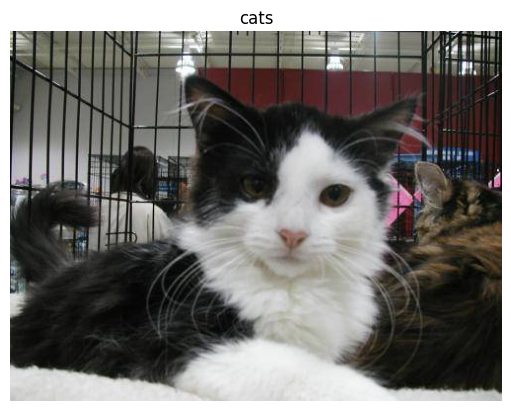

Checking folder: animals/animals/animals/dogs


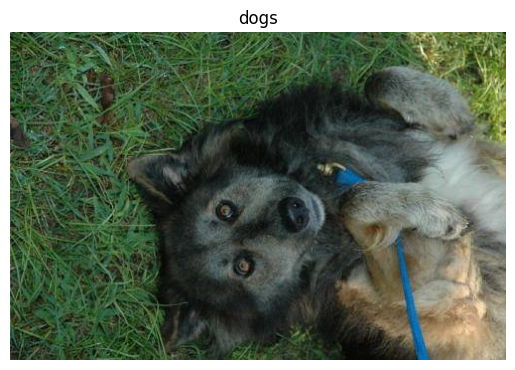

Checking folder: animals/animals/animals/panda


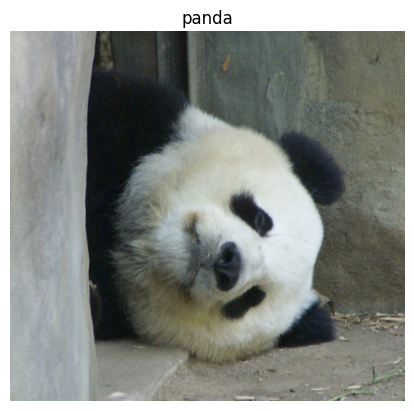

In [4]:
import matplotlib.pyplot as plt
import cv2
import os

classes = ['cats', 'dogs', 'panda']
base_path = 'animals/animals/animals'

for cls in classes:
    folder = os.path.join(base_path, cls)
    print(f'Checking folder: {folder}')
    img_list = os.listdir(folder)
    if img_list:
        img_name = img_list[0]
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
        plt.show()
    else:
        print(f'❗ No images found in {folder}')


3️⃣ Load & Preprocess Images
Load images (3000 total) and convert to grayscale (32x32).

In [5]:
import os
import cv2
import numpy as np

data_dir = 'animals/animals/animals'

classes = ['dogs', 'cats', 'panda']
data = []
labels = []

for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir)[:1000]:
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (32, 32))
        data.append(img_resized.flatten())
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (3000, 1024)
Labels shape: (3000,)


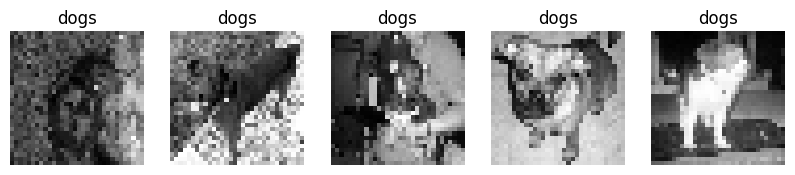

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[i].reshape(32, 32), cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.show()


In [7]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_values = [15, 20, 25, 30, 35]
results_l1 = []
results_l2 = []

for k in K_values:
    acc_l1 = []
    acc_l2 = []
    for train_idx, val_idx in skf.split(data, labels):
        X_train, X_val = data[train_idx], data[val_idx]
        y_train, y_val = labels[train_idx], labels[val_idx]


        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l1.fit(X_train, y_train)
        pred_l1 = knn_l1.predict(X_val)
        acc_l1.append(accuracy_score(y_val, pred_l1))


        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_l2.fit(X_train, y_train)
        pred_l2 = knn_l2.predict(X_val)
        acc_l2.append(accuracy_score(y_val, pred_l2))

    results_l1.append(np.mean(acc_l1))
    results_l2.append(np.mean(acc_l2))
    print(f"K={k}: L1 avg acc={np.mean(acc_l1):.4f}, L2 avg acc={np.mean(acc_l2):.4f}")

K=15: L1 avg acc=0.4767, L2 avg acc=0.4153
K=20: L1 avg acc=0.4840, L2 avg acc=0.4153
K=25: L1 avg acc=0.4790, L2 avg acc=0.4277
K=30: L1 avg acc=0.4850, L2 avg acc=0.4243
K=35: L1 avg acc=0.4820, L2 avg acc=0.4233


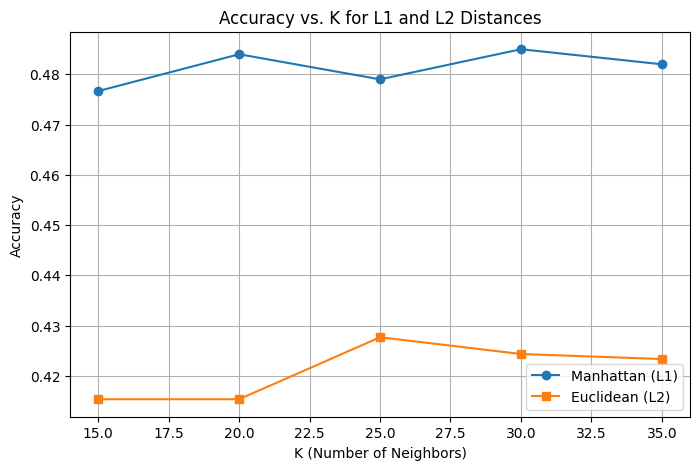

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(K_values, results_l1, marker='o', label='Manhattan (L1)')
plt.plot(K_values, results_l2, marker='s', label='Euclidean (L2)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for L1 and L2 Distances')
plt.legend()
plt.grid(True)
plt.show()

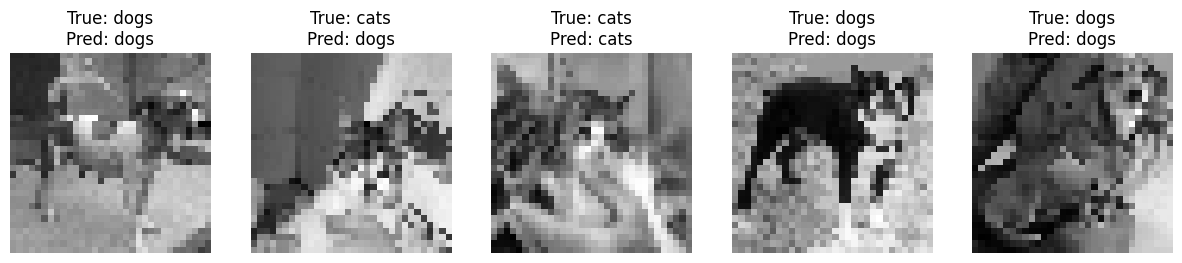

In [13]:
import random

test_idx = random.sample(range(len(data)), 5)
test_images = data[test_idx]
true_labels = labels[test_idx]


best_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
best_knn.fit(data, labels)
preds = best_knn.predict(test_images)


plt.figure(figsize=(15, 3))
for i, idx in enumerate(test_idx):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[idx].reshape(32, 32), cmap='gray')
    plt.title(f'True: {classes[true_labels[i]]}\nPred: {classes[preds[i]]}')
    plt.axis('off')
plt.show()